Interview : Tim Geda

The process used to create the canopy height map is through:

1. Merging the DSM layers to form one .tif
2. Doing a raster math calculation that will derive the CHM. Canopy height is digital surface model subtracted from the digital elevation model.
3. Visualize the histogram of tree height in metres.
4. Export the CHM .tif 

# Merge the DSM layers

In [ ]:
pip install rioxarray

In [1]:
import rasterio
import numpy as np
import xarray as xr
import mapclassify as mc
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import glob
import os
import rioxarray
from rasterio.merge import merge
from rasterio.plot import show

#### set paths for the dsm and the dem then search for the .tifs within the paths.

In [2]:
dirpath = r'E:\dem\dsm'

In [3]:
outpath = r'E:\rasteroutput\Mosaic.tif'

In [4]:
search = "d*.tif"

In [5]:
q = os.path.join(dirpath, search)

In [6]:
print(q)

E:\dem\dsm\d*.tif


In [7]:
dsm = glob.glob(q)


In [8]:
dsm

['E:\\dem\\dsm\\dsm_3d.tif',
 'E:\\dem\\dsm\\dsm_3e.tif',
 'E:\\dem\\dsm\\dsm_3g.tif']

In [9]:
src_files_to_mosaic = []

#### Merge the .tif files to one mosaic

In [10]:
for fp in dsm:
    src = rasterio.open(fp)
    src_files_to_mosaic.append(src)

In [11]:
src_files_to_mosaic

[<open DatasetReader name='E:/dem/dsm/dsm_3d.tif' mode='r'>,
 <open DatasetReader name='E:/dem/dsm/dsm_3e.tif' mode='r'>,
 <open DatasetReader name='E:/dem/dsm/dsm_3g.tif' mode='r'>]

In [12]:
mosaic, out_trans = merge(src_files_to_mosaic)

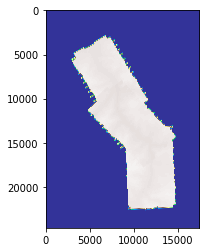

<AxesSubplot:>

In [14]:
show(mosaic, cmap='terrain')

In [15]:
#export the mosaic
out_meta = src.meta.copy()


In [16]:
out_meta.update({"driver": "GTiff",
                 "height": mosaic.shape[1],
                 "width": mosaic.shape[2],
                  "transform": out_trans,
                })

In [17]:
with rasterio.open(outpath, "w", **out_meta) as dest:
    dest.write(mosaic)

# Raster Math

In [18]:
dsm_merged = rioxarray.open_rasterio(r'E:\rasteroutput\Mosaic.tif', masked=True)
dem = rioxarray.open_rasterio(r"E:\dem\dem_3_copernicus_clipped.tif", masked=True)

In [19]:
#set the reference layer as the dsm
terrain_matched = dem.rio.reproject_match(dsm_merged)

In [20]:
#perform the calculation
canopy = dsm_merged - terrain_matched

In [21]:
canopy.compute()

<xarray.DataArray (band: 1, y: 24632, x: 17385)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 -111.4 -111.4 -111.4 ... -111.1 -111.1 -111.1
  * y            (y) float64 45.54 45.54 45.54 45.54 ... 45.27 45.27 45.27 45.27
    spatial_ref  int32 0

Text(0.5, 1.0, 'Histogram of Canopy Height in Metres')

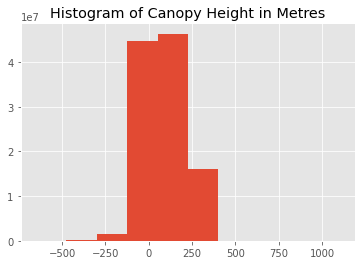

In [22]:
#visualizing the canopy heights
plt.figure()
plt.style.use('ggplot')
canopy.plot.hist()
plt.title("Histogram of Canopy Height in Metres")

In [24]:
canopy.rio.write_crs(dsm_merged.rio.crs, inplace=True)
canopy.rio.set_nodata(-9999.0, inplace=True)

<xarray.DataArray (band: 1, y: 24632, x: 17385)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * band         (band) int32 1
  * x            (x) float64 -111.4 -111.4 -111.4 ... -111.1 -111.1 -111.1
  * y            (y) float64 45.54 45.54 45.54 45.54 ... 45.27 45.27 45.27 45.27
    spatial_ref  int32 0

In [25]:

canopy.rio.to_raster(r"E:\rasteroutput\CHM.tif")

timlamec
